In [544]:
#Import Libs

import numpy as np
import pandas as pd
import matplotlib as plt

import seaborn as sns

In [545]:
df = pd.read_csv('train.csv')

In [546]:
df['Credit_History'] = df['Credit_History'].fillna( df['Credit_History'].dropna().mode().values[0] )
df['Self_Employed'] = df['Self_Employed'].fillna( df['Self_Employed'].dropna().mode().values[0] )
df['LoanAmount'] = df['LoanAmount'].fillna( df['LoanAmount'].dropna().mean())
df['Dependents'] = df['Dependents'].fillna( df['Dependents'].dropna().mode().values[0] )
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna( df['Loan_Amount_Term'].dropna().mode().values[0] )
df['Gender'] = df['Gender'].fillna( df['Gender'].dropna().mode().values[0] )
df['Married'] = df['Married'].fillna( df['Married'].dropna().mode().values[0] )
df['Self_Employed'] = df['Self_Employed'].fillna( df['Self_Employed'].dropna().mode().values[0] )
df['Gender'] = df['Gender'].map({'Female':0,'Male':1}).astype(np.int)
df['Married'] = df['Married'].map({'No':0,'Yes':1}).astype(np.int)
df['Education'] = df['Education'].map({'Not Graduate':0,'Graduate':1}).astype(np.int)
df['Self_Employed'] = df['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.int)
df['Loan_Status'] = df['Loan_Status'].map({'N':0, 'Y':1}).astype(np.int)
df['Dependents'] = df['Dependents'].str.rstrip('+')
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna( df['Loan_Amount_Term'].dropna().mode().values[0] )
df['Credit_History'] = df['Credit_History'].fillna( df['Credit_History'].dropna().mode().values[0] )
column_names =['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area','LoanAmount','Loan_Status'] 
df = df.reindex(columns = column_names)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,360.0,1.0,Urban,146.412162,1
1,LP001003,1,1,1,1,0,4583,1508.0,360.0,1.0,Rural,128.000000,0
2,LP001005,1,1,0,1,1,3000,0.0,360.0,1.0,Urban,66.000000,1
3,LP001006,1,1,0,0,0,2583,2358.0,360.0,1.0,Urban,120.000000,1
4,LP001008,1,0,0,1,0,6000,0.0,360.0,1.0,Urban,141.000000,1


In [547]:
# log transformation
# df['LoanAmount_log']=np.log(df['LoanAmount'])
# df['LoanAmount'].hist(bins=20)
# df['LoanAmount_log']=np.log(df['LoanAmount'])
# df.drop('LoanAmount',1, inplace = True)

In [548]:
X = df.drop(['Loan_ID','Loan_Status'],1)
y = df['Loan_Status']

In [549]:
X = pd.get_dummies(X)
X.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,LoanAmount,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,0,5849,0.0,360.0,1.0,146.412162,1,0,0,0,0,0,1
1,1,1,1,0,4583,1508.0,360.0,1.0,128.000000,0,1,0,0,1,0,0
2,1,1,1,1,3000,0.0,360.0,1.0,66.000000,1,0,0,0,0,0,1
3,1,1,0,0,2583,2358.0,360.0,1.0,120.000000,1,0,0,0,0,0,1
4,1,0,1,0,6000,0.0,360.0,1.0,141.000000,1,0,0,0,0,0,1


In [550]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [551]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(429, 16)
(185, 16)
(429,)
(185,)


In [552]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
nums = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
X_train[nums] = scaler.fit_transform(X_train[nums])

In [553]:
nums = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
X_test[nums] = scaler.fit_transform(X_test[nums])

### 1.Logistic Regression

In [555]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [556]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8108108108108109

In [557]:
from sklearn.metrics import confusion_matrix

In [558]:
confusion_matrix(y_test, y_pred)

array([[ 27,  32],
       [  3, 123]], dtype=int64)

### 1.1 Predictions on test data

In [559]:
test = pd.read_csv('test.csv')

In [560]:
test['Credit_History'] = test['Credit_History'].fillna( test['Credit_History'].dropna().mode().values[0] )
test['Self_Employed'] = test['Self_Employed'].fillna( test['Self_Employed'].dropna().mode().values[0] )
test['LoanAmount'] = test['LoanAmount'].fillna( test['LoanAmount'].dropna().mean())
test['Dependents'] = test['Dependents'].fillna( test['Dependents'].dropna().mode().values[0] )
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna( test['Loan_Amount_Term'].dropna().mode().values[0] )
test['Gender'] = test['Gender'].fillna( test['Gender'].dropna().mode().values[0] )
test['Married'] = test['Married'].fillna( test['Married'].dropna().mode().values[0] )
test['Self_Employed'] = test['Self_Employed'].fillna( test['Self_Employed'].dropna().mode().values[0] )
test['Gender'] = test['Gender'].map({'Female':0,'Male':1}).astype(np.int)
test['Married'] = test['Married'].map({'No':0,'Yes':1}).astype(np.int)
test['Education'] = test['Education'].map({'Not Graduate':0,'Graduate':1}).astype(np.int)
test['Self_Employed'] = test['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.int)
# test['Loan_Status'] = test['Loan_Status'].map({'N':0, 'Y':1}).astype(np.int)
test['Dependents'] = test['Dependents'].str.rstrip('+')
# test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna( test['Loan_Amount_Term'].dropna().mode().values[0] )
test['Credit_History'] = test['Credit_History'].fillna( test['Credit_History'].dropna().mode().values[0] )
column_names =['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area','LoanAmount'] 
test = test.reindex(columns = column_names)
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount
0,LP001015,1,1,0,1,0,5720,0,360.0,1.0,Urban,110.0
1,LP001022,1,1,1,1,0,3076,1500,360.0,1.0,Urban,126.0
2,LP001031,1,1,2,1,0,5000,1800,360.0,1.0,Urban,208.0
3,LP001035,1,1,2,1,0,2340,2546,360.0,1.0,Urban,100.0
4,LP001051,1,0,0,0,0,3276,0,360.0,1.0,Urban,78.0


In [561]:
test.drop('Loan_ID',1,inplace=True)


In [562]:
test = pd.get_dummies(test)
test.shape

(367, 16)

In [563]:
#test[nums] = scaler.fit(test[nums])

In [564]:
pred_test = model.predict(test)

In [565]:
submission = pd.read_csv('submission.csv')

In [566]:
submission['Loan_Status'] = pred_test
submission['Loan_Status']= submission['Loan_Status'].map({1:'Y',0:'N'})
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,N
2,LP001031,Y
3,LP001035,N
4,LP001051,Y


In [567]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Final_Submission.csv')

In [568]:
def scaling(data,nums):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    data[nums] = scaler.fit_transform(data[nums]) 

In [569]:
df.head()
train = df.copy()
train.drop('Loan_ID',1,inplace=True)
cols = ['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','LoanAmount']
scaling(train,cols)
train = pd.get_dummies(train)
train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,LoanAmount,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,0,0.072991,-0.554487,0.273231,1.0,0.000000,1,1,0,0,0,0,0,1
1,1,1,1,0,-0.134412,-0.038732,0.273231,1.0,-0.219273,0,0,1,0,0,1,0,0
2,1,1,1,1,-0.393747,-0.554487,0.273231,1.0,-0.957641,1,1,0,0,0,0,0,1
3,1,1,0,0,-0.462062,0.251980,0.273231,1.0,-0.314547,1,1,0,0,0,0,0,1
4,1,0,1,0,0.097728,-0.554487,0.273231,1.0,-0.064454,1,1,0,0,0,0,0,1


In [570]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = train.columns
classification_model(model, train,predictor_var,outcome_var)


Accuracy : 100.000%


#### above is the sign of overfitting, we need to perform cross validation and learn the algorithm well.

In [571]:
from sklearn.model_selection import StratifiedKFold

In [572]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
    print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.8130081300813008

 Mean Validation Accuracy 0.8130081300813008

2 of kfold 5 
accuracy_score 0.7723577235772358

 Mean Validation Accuracy 0.7926829268292683

3 of kfold 5 
accuracy_score 0.7804878048780488

 Mean Validation Accuracy 0.7886178861788619

4 of kfold 5 
accuracy_score 0.8292682926829268

 Mean Validation Accuracy 0.7987804878048781

5 of kfold 5 
accuracy_score 0.7868852459016393

 Mean Validation Accuracy 0.7964014394242304


### 2. Decision Tress

In [573]:
from sklearn import tree
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.7398373983739838

2 of kfold 5 
accuracy_score 0.7154471544715447

3 of kfold 5 
accuracy_score 0.7398373983739838

4 of kfold 5 
accuracy_score 0.7073170731707317

5 of kfold 5 
accuracy_score 0.680327868852459

 Mean Validation Accuracy 0.7165533786485405


### 3. Random Forest

In [574]:
from sklearn.ensemble import RandomForestClassifier
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
 print ('\n{} of kfold {} '.format(i,kf.n_splits))
 xtr,xvl = X.loc[train_index],X.loc[test_index]
 ytr,yvl = y[train_index],y[test_index]
 model = RandomForestClassifier(random_state=1, max_depth=10)
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(test)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.8048780487804879

2 of kfold 5 
accuracy_score 0.8373983739837398

3 of kfold 5 
accuracy_score 0.7967479674796748

4 of kfold 5 
accuracy_score 0.8211382113821138

5 of kfold 5 
accuracy_score 0.7786885245901639

 Mean Validation Accuracy 0.8077702252432359


### 4.Grid Search CV

In [575]:
from sklearn.model_selection import GridSearchCV

paramgrid = {'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}

grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

grid_search.fit(X_train,y_train)
GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})
grid_search.best_estimator_
RandomForestClassifier(max_depth=5, n_estimators=41, random_state=1)
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.8130081300813008

2 of kfold 5 
accuracy_score 0.8292682926829268

3 of kfold 5 
accuracy_score 0.7967479674796748

4 of kfold 5 
accuracy_score 0.8048780487804879

5 of kfold 5 
accuracy_score 0.7950819672131147

 Mean Validation Accuracy 0.807796881247501


### 5. Feature Importance

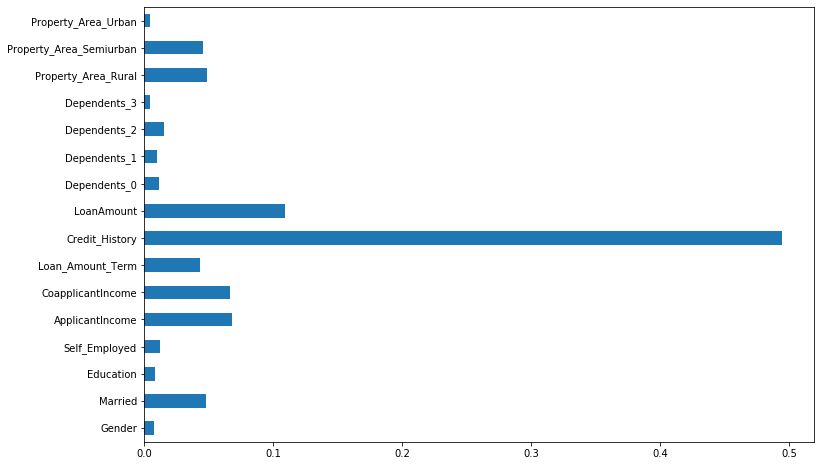

In [537]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

### 6. XGBoosting

In [539]:
from xgboost import XGBClassifier
i=1 
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
 print('\n{} of kfold {}'.format(i,kf.n_splits)) 
 xtr,xvl = X.loc[train_index],X.loc[test_index] 
 ytr,yvl = y[train_index],y[test_index] 
 model = XGBClassifier(n_estimators=50, max_depth=4) 
 model.fit(xtr, ytr) 
 pred_test = model.predict(xvl) 
 score = accuracy_score(yvl,pred_test) 
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(test)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8292682926829268

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.7868852459016393

 Mean Validation Accuracy 0.7996534719445556


In [543]:
submission['Loan_Status']=pred_test
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('XGBoostresults.csv')